In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [37]:
RESULTS_DIR = "results/2025_08_09_124750" # Adjust to your results directory

print("Loading:", RESULTS_DIR + "/experiment_summary.csv")

Loading: results/2025_08_09_124750/experiment_summary.csv


In [38]:
summary = pd.read_csv(f"{RESULTS_DIR}/experiment_summary.csv")
display(summary.head())

,variant,seed,episode,return,accepts
0,Fixed,0,1,1953.292432,NaN
1,Fixed,0,2,5882.022804,NaN
2,Fixed,0,3,6568.786010,NaN
3,Fixed,0,4,8015.252956,NaN
4,Fixed,0,5,8311.803149,NaN


## Mean Discounted Return pro Episode

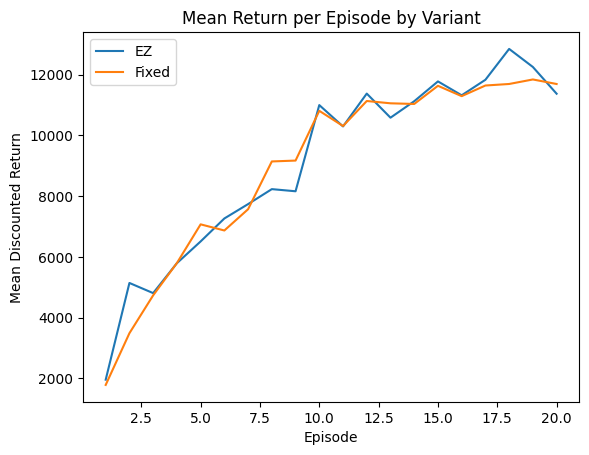

In [39]:

plt.figure()
for variant, grp in summary.groupby("variant"):
    mean_ret = grp.groupby("episode")["return"].mean()
    plt.plot(mean_ret.index, mean_ret.values, label=variant)
plt.xlabel("Episode")
plt.ylabel("Mean Discounted Return")
plt.title("Mean Return per Episode by Variant")
plt.legend()
plt.show()

## Return-Distributions

<Figure size 640x480 with 0 Axes>

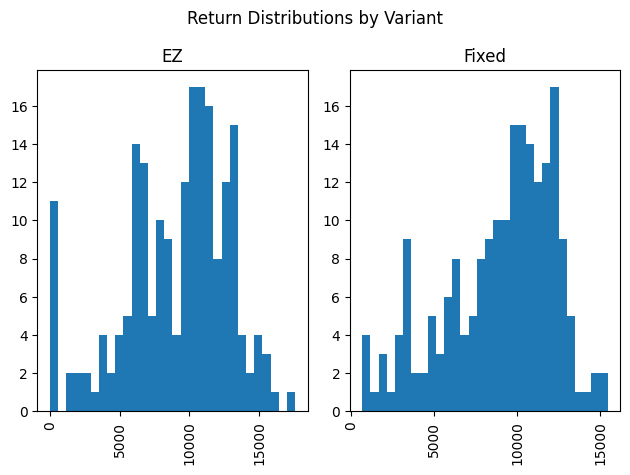

In [40]:
plt.figure()
summary.hist(column="return", by="variant", bins=30)
plt.suptitle("Return Distributions by Variant")
plt.tight_layout()
plt.show()

## Risk, Age & Region Distribution

In [41]:
summary = pd.read_csv(f"{RESULTS_DIR}/experiment_summary.csv")
variants = summary["variant"].unique()
seeds    = summary["seed"].unique()


>>> Sample der angenommenen Profiles für Variante 'Fixed':
   episode  step  profile_idx  action  age  region  risk_score
0        1    12           88       1   35       3    0.958414
1        1    18           68       1   48       4    0.626506
2        1    33           91       1   53       0    0.670062
3        1    50            2       1   29       4    0.912756
4        1    52           68       1   48       4    0.626506 



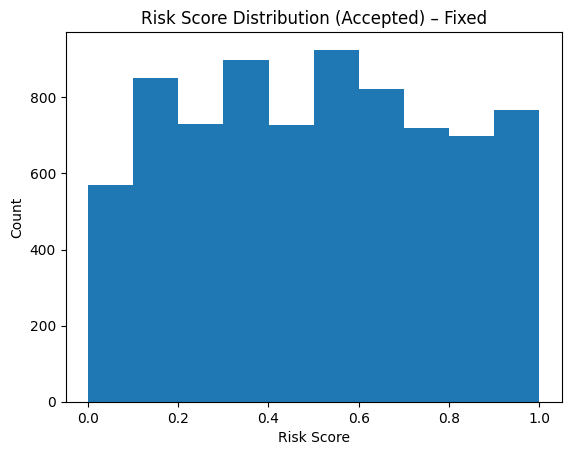

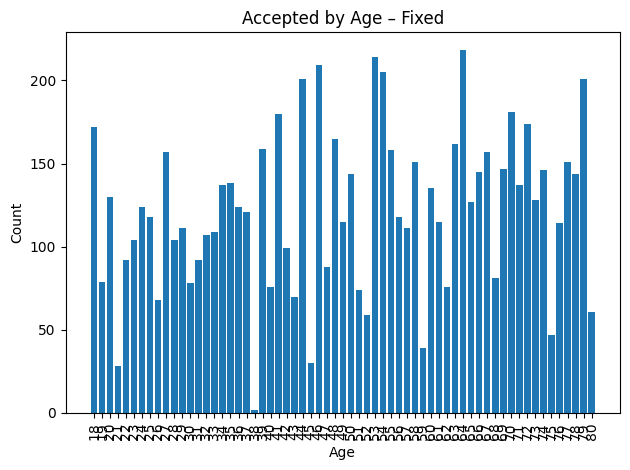

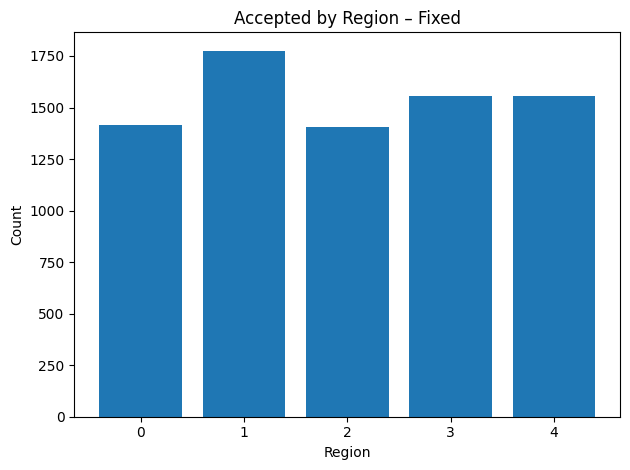


>>> Sample der angenommenen Profiles für Variante 'EZ':
   episode  step  profile_idx  action  age  region  risk_score
0        2    58           97       1   51       4    0.571396
1        2    59           50       1   32       2    0.232373
2        2    60           75       1   25       0    0.365046
3        2    61           24       1   21       0    0.832644
4        2    62           86       1   64       1    0.182712 



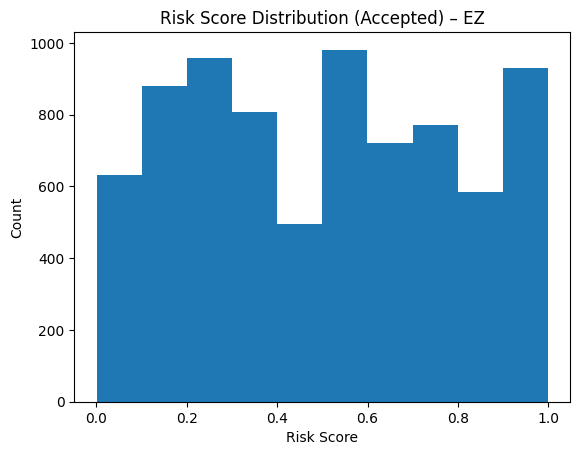

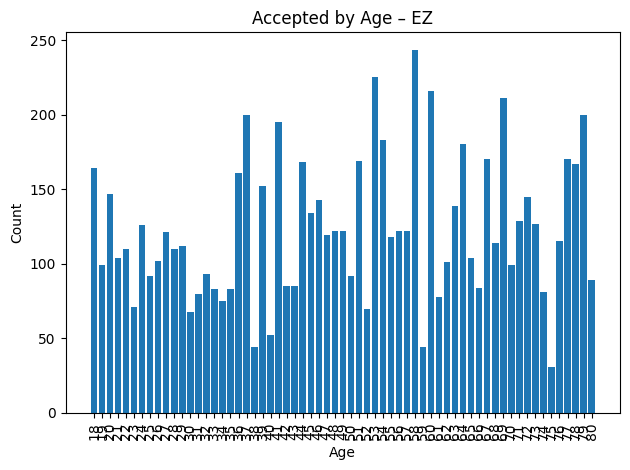

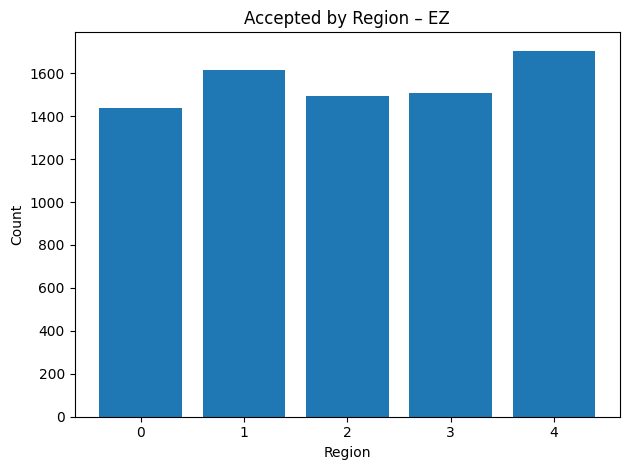

In [42]:
for variant in variants:
    # Liste sammeln über alle Seeds
    accepted_all = []
    for seed in seeds:
        # Profile und Aktionen pro Run laden
        prof_df = pd.read_csv(f"{RESULTS_DIR}/profiles_{variant}_{seed}.csv")
        act_df  = pd.read_csv(f"{RESULTS_DIR}/actions_{variant}_{seed}.csv")
        # Mergen, dann nur Akzeptierte filtern
        merged  = act_df.merge(prof_df, on="profile_idx")
        accepted = merged[merged["action"] == 1]
        accepted_all.append(accepted)
    # Alles zusammenführen
    accepted_df = pd.concat(accepted_all, ignore_index=True)
    
    # ---- Ausgabe: Sample-Tabelle ----
    print(f"\n>>> Sample der angenommenen Profiles für Variante '{variant}':")
    print(accepted_df.head(), "\n")

    # ---- Plot 1: Risikoscore-Verteilung ----
    plt.figure()
    plt.hist(accepted_df["risk_score"], bins=10)
    plt.title(f"Risk Score Distribution (Accepted) – {variant}")
    plt.xlabel("Risk Score")
    plt.ylabel("Count")
    plt.show()

    # ---- Plot 2: Akzeptanzen nach Alter ----
    plt.figure()
    age_counts = accepted_df["age"].value_counts().sort_index()
    plt.bar(age_counts.index.astype(str), age_counts.values)
    plt.title(f"Accepted by Age – {variant}")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # ---- Plot 3: Akzeptanzen nach Region ----
    plt.figure()
    region_counts = accepted_df["region"].value_counts().sort_index()
    plt.bar(region_counts.index.astype(str), region_counts.values)
    plt.title(f"Accepted by Region – {variant}")
    plt.xlabel("Region")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()